# Varianzas

La varianza es una medida estadística que indica cuánto se dispersan los datos en un conjunto respecto a su media. En otras palabras, nos dice cuán alejados están los datos de su valor promedio.
$$
\sigma^2 = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2
$$
La varianza acumulativa es la suma de la varianza explicada por los primeros componentes principales. Sirve para saber cuánta información total se ha conservado al reducir dimensiones en un conjunto de datos.

- Se expresa como un porcentaje del total de la varianza.

- Se usa para decidir cuántos componentes se necesitan para representar bien los datos sin perder mucha información.

## Importamos las librerias

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns


## Definimos nuestras funciones

In [16]:
def plot_variance(ratio, title):
    plt.figure(figsize=(8, 5))
    plt.plot(np.arange(1, len(ratio)+1), ratio, marker='.', label='Varianza acumulada')
    plt.axhline(y=0.9, color='orange', linestyle='--', label='Limite del 90%')
    final_title = 'Varianza Acumulativa por Skill ',title
    plt.title(final_title)
    plt.xlabel('Número de Skills')
    plt.ylabel('Proporción de Varianza Acumulada')
    plt.xticks(np.arange(1, len(ratio)+1))
    plt.legend()
    plt.tight_layout()
    plt.show()

def calculate_variance(data, title):
	variances = data.var().sort_values(ascending=False) #calculamos la varianza y la ordenamos de forma que se muestre

	varianza_acumulativa = variances.cumsum()
	varianza_total = variances.sum()
	ratio = varianza_acumulativa / varianza_total
	plot_variance(ratio, title)

## Importamos los datos

In [17]:
direction_train = "../Train_knight.csv"
data = pd.read_csv(direction_train)
data["knight"] = data["knight"].map({"Jedi": 1, "Sith": 0})

## Normalizamos los datos

In [18]:
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# Convertimos de nuevo a DataFrame para que sea legible
data_normalized = pd.DataFrame(data_normalized, columns=data.columns)

## Calculamos la varianza

AttributeError: 'str' object has no attribute 'items'

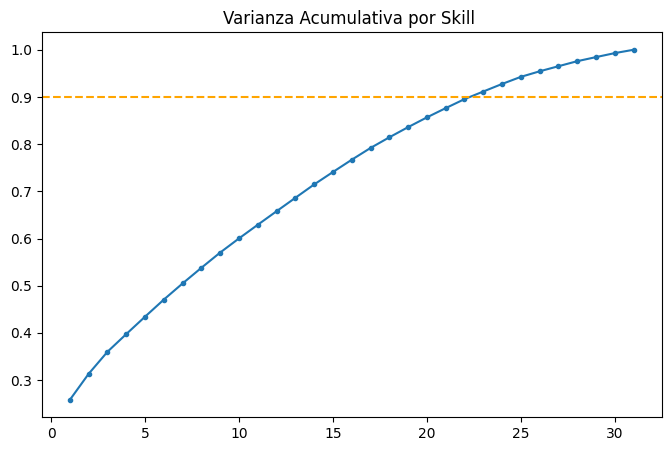

In [19]:
#Calculamos la varianza con los datos normalizados
calculate_variance(data_normalized,"con datos normalizados")
#Calculamos la varianza con los datos sin normalizar
calculate_variance(data,"con datos sin normalizar")

